<a href="https://colab.research.google.com/github/SuhrudhSarathy/ForestDeptProj/blob/main/DataPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run this once the dataset gets updated. \\
This notebook is to prepare the dataset for training the model.

In [ ]:
import torch
from collections import Counter
import pandas as pd
import os
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# My drive is already mounted

Splitting the images into train, test, val directories

In [ ]:
# Dataset available
os.listdir("/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/")
dataset_path = "/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/"

In [ ]:
imagePath=dataset_path
categories =glob(imagePath + "*")
# Print the categories
print(categories)

['/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/Ceriops Tagal', '/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/Kandelia Candel', '/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/Acanthus Ilicifolius', '/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/Excoecaria Agallocha', '/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/Bruguiera cylindrica', '/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/Bruguiera gymnorrihza', '/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/Lumnizera recemosa', '/content/drive/MyDrive/Aero Forest Project/Augmented_Datasets/Rhizophora apiculata']


In [ ]:
filedf = pd.DataFrame()
for cat in categories:
    files = glob(cat+"/*")
    tempdf = pd.DataFrame({'filepath':files,'category':cat.split("/")[-1]})
    filedf = pd.concat([filedf,tempdf])

In [ ]:
filedf.head()

,filepath,category
0,/content/drive/MyDrive/Aero Forest Project/Aug...,Ceriops Tagal
1,/content/drive/MyDrive/Aero Forest Project/Aug...,Ceriops Tagal
2,/content/drive/MyDrive/Aero Forest Project/Aug...,Ceriops Tagal
3,/content/drive/MyDrive/Aero Forest Project/Aug...,Ceriops Tagal
4,/content/drive/MyDrive/Aero Forest Project/Aug...,Ceriops Tagal


In [ ]:
# Check the counts of each category
gby_cnt = filedf.groupby("category").aggregate('count').rename(columns = {'filepath':'cnt'}).reset_index().sort_values(by='cnt',ascending=False)
gby_cnt

,category,cnt
0,Acanthus Ilicifolius,1575
4,Excoecaria Agallocha,1358
3,Ceriops Tagal,455
5,Kandelia Candel,420
2,Bruguiera gymnorrihza,399
6,Lumnizera recemosa,308
7,Rhizophora apiculata,294
1,Bruguiera cylindrica,252


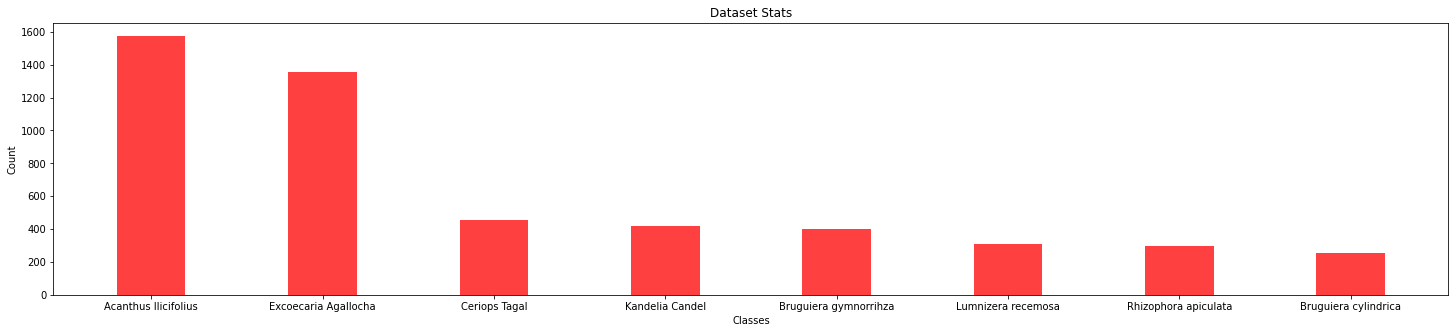

In [ ]:
classes = [gby_cnt.iloc[i][0] for i in range(len(gby_cnt))]
count = [gby_cnt.iloc[i][1] for i in range(len(gby_cnt))]
fig = plt.figure(figsize = (25, 5))
 
# creating the bar plot
plt.bar(classes, count, color ='red', width = 0.4, alpha=0.75)
 
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Dataset Stats")
plt.show()

In [ ]:
# Check for skewed data sample and resample them to 500 images
all_cats = []
for cat in gby_cnt["category"]:
    cat = filedf[filedf.category == cat]
    if len(cat) > 400:
        # resample the data
        cat = resample(cat, replace=True, n_samples=400, random_state=27)
    all_cats.append(cat)

In [ ]:
# Check the distribution again
filedf2 = pd.concat(all_cats)
gby_cnt2 = filedf2.groupby("category").aggregate('count').rename(columns = {'filepath':'cnt'}).reset_index().sort_values(by='cnt',ascending=False)
gby_cnt2

,category,cnt
0,Acanthus Ilicifolius,400
3,Ceriops Tagal,400
4,Excoecaria Agallocha,400
5,Kandelia Candel,400
2,Bruguiera gymnorrihza,399
6,Lumnizera recemosa,308
7,Rhizophora apiculata,294
1,Bruguiera cylindrica,252


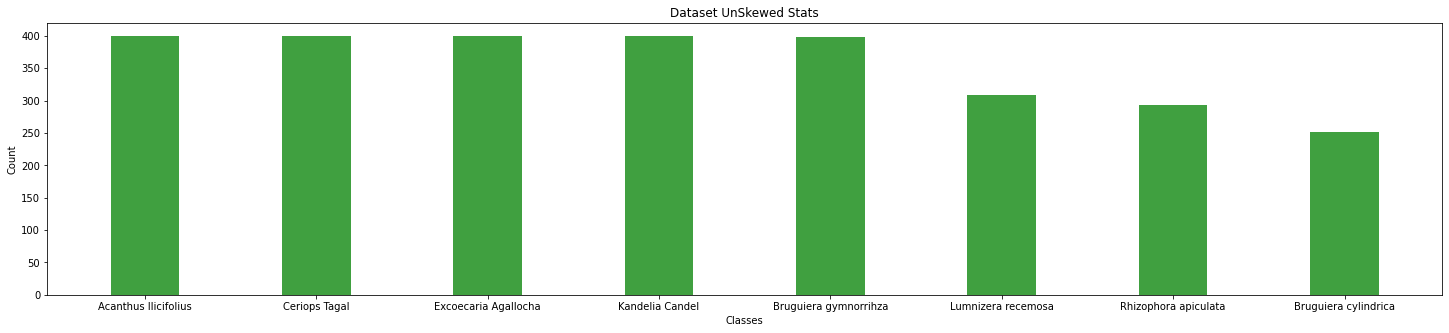

In [ ]:
classes = [gby_cnt2.iloc[i][0] for i in range(len(gby_cnt))]
count = [gby_cnt2.iloc[i][1] for i in range(len(gby_cnt))]
fig = plt.figure(figsize = (25, 5))
 
# creating the bar plot
plt.bar(classes, count, color ='green', width = 0.4, alpha=0.75)
 
plt.xlabel("Classes")
plt.ylabel("Count")
plt.title("Dataset UnSkewed Stats")
plt.show()

In [ ]:
# Just to now break anything further
filedf = filedf2

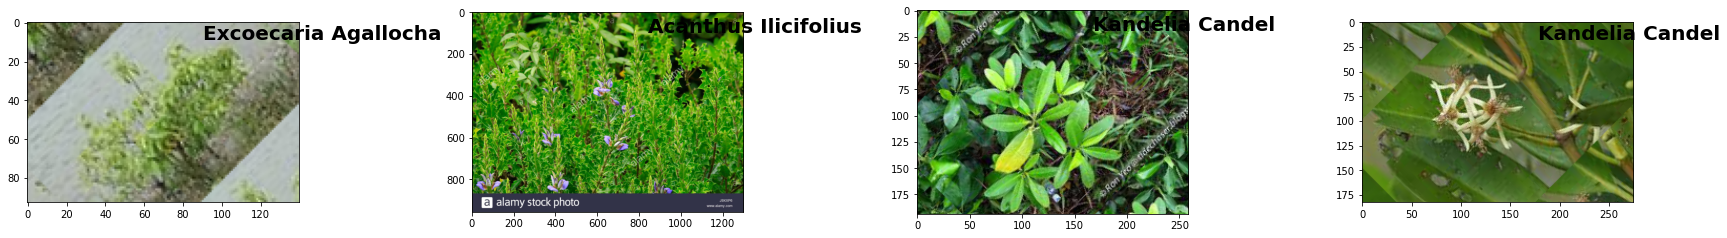

In [ ]:
# Check some images from the data set
plt.figure(figsize=(24, 24))

for i in range(4):
    path = filedf.sample(1)['filepath'].values[0]
    category = path.split("/")[-2]
    ex_img = Image.open(path)
    ax = plt.subplot(4, 4, i + 1)
    ax.annotate(category, xy=(0.65, 0.9), xycoords="axes fraction",weight='bold',size=20)
    ax.imshow(ex_img)

plt.tight_layout()
plt.show()

In [ ]:
# Split the dataset into train, test, val
X_train, X_test, _, _ = train_test_split(
        filedf, filedf['category'],stratify=filedf['category'], test_size=0.2)

X_test, X_val, _, _ = train_test_split(
        X_test, X_test['category'], stratify=X_test['category'], test_size=0.5)

In [ ]:
X_train['type'] = 'train'
X_val['type'] = 'val'
X_test['type'] = 'test'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fulldf = pd.concat([X_train,X_test,X_val])

In [ ]:
fulldf.type.value_counts()

train    2282
val       286
test      285
Name: type, dtype: int64

In [ ]:
fulldf.head()

,filepath,category,type
67,/content/drive/MyDrive/Aero Forest Project/Aug...,Ceriops Tagal,train
164,/content/drive/MyDrive/Aero Forest Project/Aug...,Kandelia Candel,train
98,/content/drive/MyDrive/Aero Forest Project/Aug...,Lumnizera recemosa,train
887,/content/drive/MyDrive/Aero Forest Project/Aug...,Acanthus Ilicifolius,train
170,/content/drive/MyDrive/Aero Forest Project/Aug...,Rhizophora apiculata,train


In [ ]:
from os import mkdir
path = "drive/MyDrive/Aero Forest Project/data"
# make the train, test, val folders
mkdir(f"{path}/train") 
mkdir(f"{path}/test") 
mkdir(f"{path}/val")

In [ ]:
try:
    for cat in fulldf.category.unique():
        mkdir(f"{path}/train/{cat}") 
        mkdir(f"{path}/test/{cat}") 
        mkdir(f"{path}/val/{cat}")
except Exception:
    print("Folder already exists. Delete that first")

In [ ]:
from tqdm import tqdm
from shutil import copy
for i,row in tqdm(fulldf.iterrows()):
    # Boat category
    cat = row['category']
    # section is train,val or test
    section = row['type']
    # input filepath to copy
    ipath = row['filepath']
    # output filepath to paste
    fname = ipath.split("/")[-1]
    opath = f"{path}/{section}/{cat}/{fname}"
    # running the cp command
    copy(ipath, opath)

2853it [02:09, 22.04it/s]
